# Visualizing The Gender Gap In College Degrees


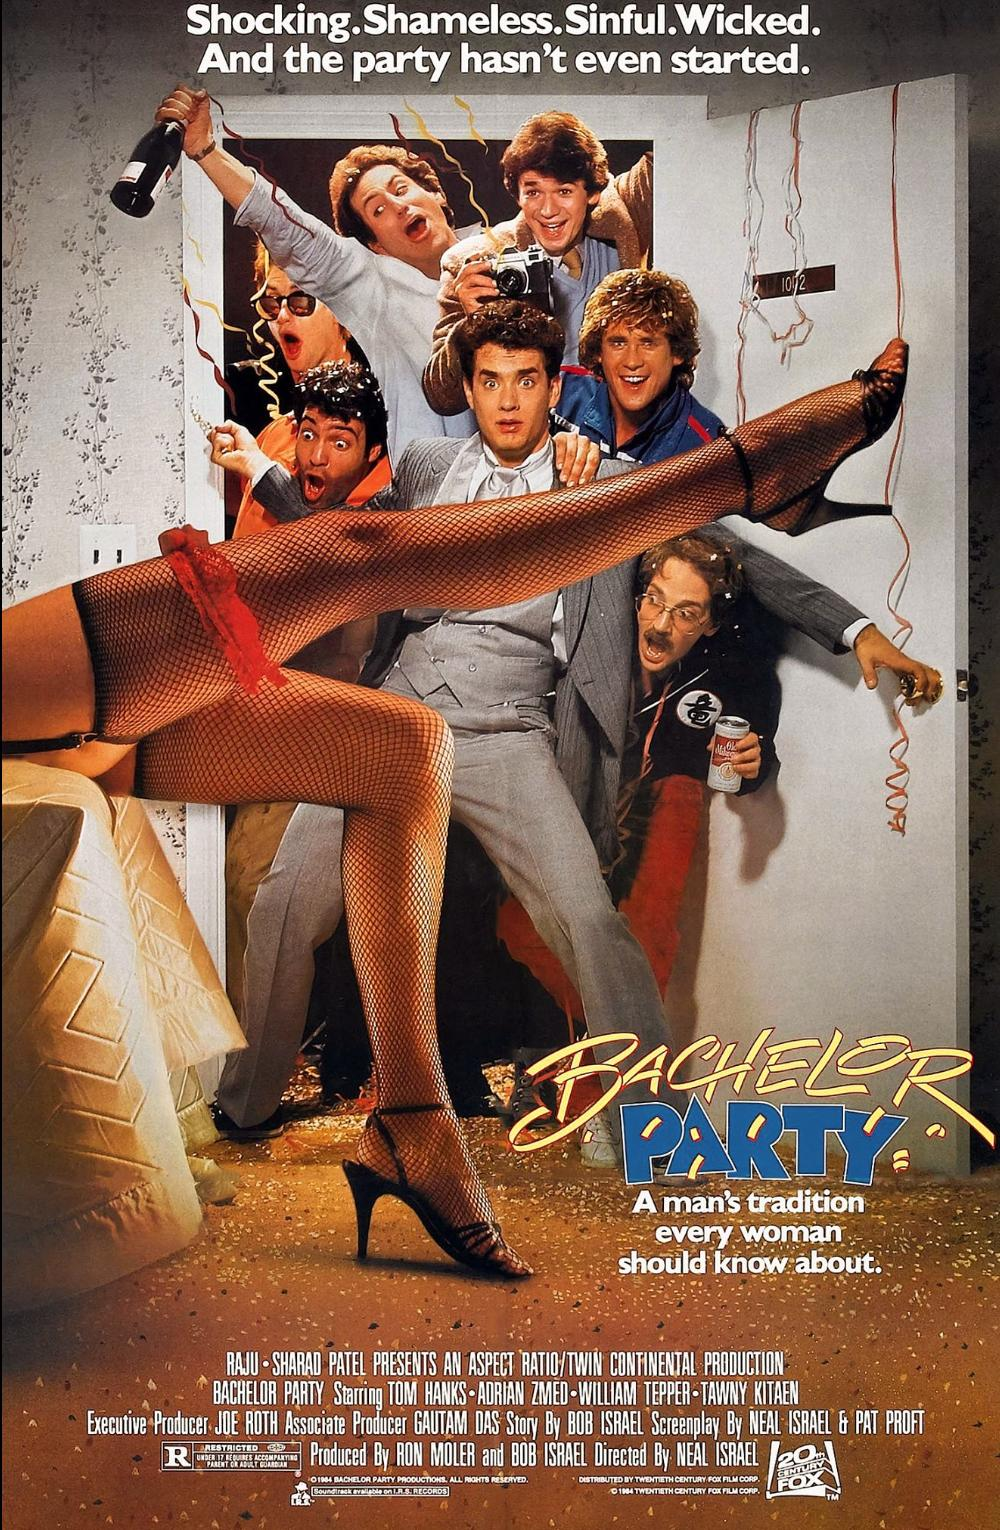

` The goal of this work - visual express analyzing percentage ration between man and women graduated bachelor in the USA from 1970 to 2011 year`


*  The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.


*  Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled <a href="http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv" target="_blank"> here</a>.



I took as a basis code from <a href="https://github.com/dataquestio/solutions/blob/master/Mission149Solutions.ipynb" target="_blank"> this</a> link and  bit modified it for possible simple automation.

Bellow - my final code for this project. 

Color for men - blue, for women - orange.

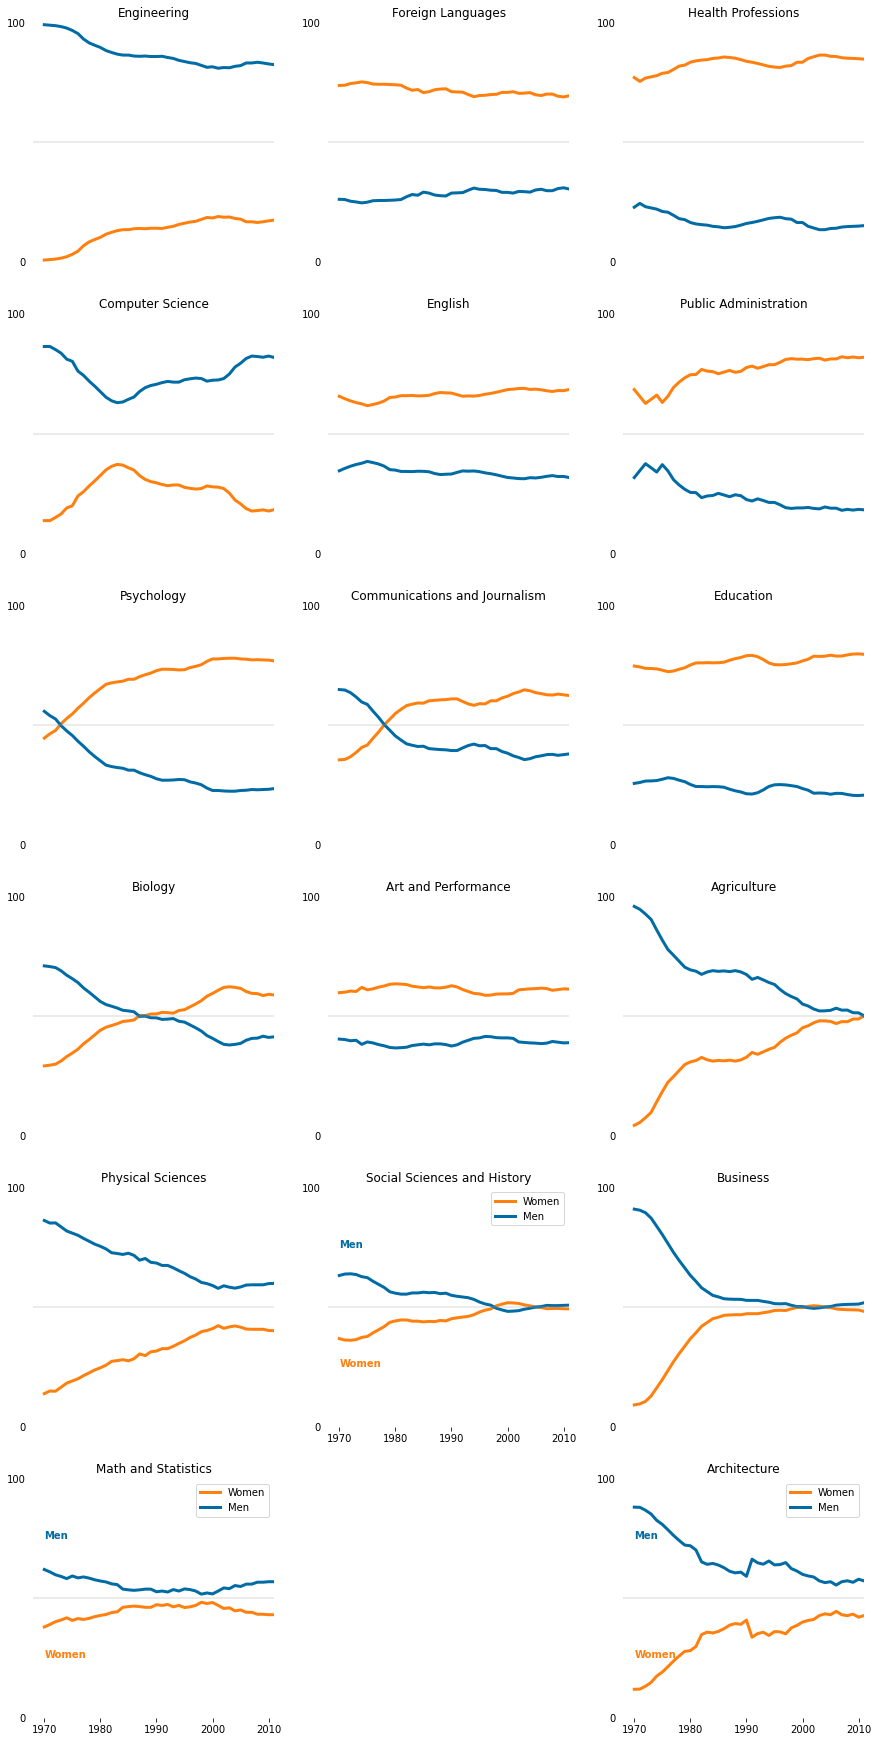

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')


women_degrees = pd.read_csv("data/percent-bachelors-degrees-women-usa.csv")
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 
            'Physical Sciences', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 
                'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 
            'Agriculture','Business', 'Architecture']
all_cats = [stem_cats, lib_arts_cats, other_cats]

# Define maximal lenght list inside list of list for determenating max rows numbers 
def len_list(x):
    if isinstance (x, list):
        yield len(x)
        for y in x:
            yield from len_list(y) 
            

# Set dimensions for plot using by axis
ax_row = max(len_list(all_cats))
ax_col = len(all_cats)


# Define subpot 
fig, ax = plt.subplots(ax_row,ax_col,  figsize=(12, 24))
# Iterate columns
for i, row in enumerate (all_cats):
    # Iterate rows
    for j, column in enumerate(row):
        # Define value for plot other styles for the lowest   cell in columns
        lowest = len(row) - 1
        ax[j,i].plot(women_degrees['Year'], 
                     women_degrees[all_cats[i][j]],
                     c=cb_orange, label='Women',
                     linewidth=3)
        ax[j,i].plot(women_degrees['Year'], 
                     100-women_degrees[all_cats[i][j]],
                     c=cb_dark_blue, label='Men', 
                     linewidth=3)
        # Define  spines list 
        spines = ["right","left", "top", "bottom"]
        # Set invisible spines by loop
        for value in spines:
            ax[j,i].spines[value].set_visible(False)    
        ax[j,i].set_xlim(1968, 2011)
        ax[j,i].set_ylim(0,100)
        ax[j,i].set_title(all_cats[i][j])
        ax[j,i].tick_params(bottom=False, 
                            top=False, 
                            left=False, 
                            right=False,
                            labelbottom=False)
        # Make Invisible x labels
        ax[j,i].set_xlabel(xlabel = '0', visible = False)
        # Make y labels for y = 0 and y = 100
        ax[j,i].set_yticks([0,100])
        # Make vertical line by  value y = 50
        ax[j,i].axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        
        # Make different plot style for the lowest cells  of columns       
        if j == lowest :
            # Label for men
            ax[j,i].text(1970, 75, 'Men',
                         color=cb_dark_blue, 
                         fontweight = 'bold',
                         horizontalalignment  = 'left')
            # Label for women
            ax[j,i].text(1970, 25, 'Women', 
                         color = cb_orange,
                         fontweight = 'bold',
                         horizontalalignment  = 'left')
            # Where place label
            ax[j,i].tick_params(bottom=True, 
                                top=False, 
                                left=False, 
                                right=False, 
                                labelbottom=True)
            ax[j,i].set_xlabel(xlabel = '', visible = True)
            # Add legend
            ax[j,i].legend(['Women','Men'])
    # Tight suboplots
    plt.tight_layout(pad = 0, h_pad = 3, w_pad = 2)        

# Remove empty plot using zero length empty subplot title
for i in range(ax_col):
    for j in range(ax_row):
        if len(ax[j][i].get_title()) == 0:
            ax[j][i].remove()
    
# Save final image
plt.savefig('gender_degrees.png')

## General conclusions:

* 1. Us we see results seems to results  in the previous work "Visualizing Earnings Based On College Majors"
-  are specializations where dominate man and are specializations where dominate women. In 2001 year women and men are almost equal in the Business and Agriculture. General trend - man prefer STEM, women - humanitarian disciplines.


* 2. We modify source code and unbind it from fixed predefined values of rows and columns and can  automate plot for  list of lists having  variable length.

Created on Feb 11, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment:

Debian 10

Python 3.8.7

required next preinstalled  python modules:

pandas

matplotlib